# 4  NumPy Basics: Arrays and Vectorized Computation

In [1]:
import numpy as np

In [2]:
my_arr = np.arange(1_000_000)

In [4]:
my_list = list(range(1_000_000))

NumPy-based algorithms are generally 10 to 100 times faster (or more) than their pure Python counterparts and use significantly less memory.

In [5]:
%timeit my_arr2 = my_arr * 2

751 μs ± 12 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [6]:
%timeit my_list2 = [x*2 for x in my_list]

25.3 ms ± 1.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# 4.1 The NumPy ndarray: A Multidimensional Array Object

data = np.array([[],[]])

In [7]:
data = np.array([[1.5, -0.1,3], [0,-3, 6.5]])

In [8]:
data

array([[ 1.5, -0.1,  3. ],
       [ 0. , -3. ,  6.5]])

In [9]:
data * 10

array([[ 15.,  -1.,  30.],
       [  0., -30.,  65.]])

In [10]:
data + data

array([[ 3. , -0.2,  6. ],
       [ 0. , -6. , 13. ]])

In the first example, all of the elements have been multiplied by 10. In the second, the corresponding values in each "cell" in the array have been added to each other.

In [11]:
data.shape

(2, 3)

In [12]:
data.dtype

dtype('float64')

In [13]:
data1 = [6, 7.5, 8, 0, 1]

In [14]:
arr1 = np.array(data1)

In [16]:
arr1

array([6. , 7.5, 8. , 0. , 1. ])

Nested sequences, like a list of equal-length lists, will be converted into a multidimensional array:

In [20]:
data2 = [[1,2,3,4], [5,6,7,8]]

In [21]:
arr2 = np.array(data2)

In [22]:
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

Since data2 was a list of lists, the NumPy array arr2 has two dimensions, with shape inferred from the data. We can confirm this by inspecting the ndim and shape attributes:

In [23]:
arr2.ndim

2

In [24]:
arr2.shape

(2, 4)

Unless explicitly specified (discussed in Data Types for ndarrays), numpy.array tries to infer a good data type for the array that it creates. The data type is stored in a special dtype metadata object; for example, in the previous two examples we have:

In [26]:
arr1.dtype

dtype('float64')

In [27]:
arr2.dtype

dtype('int64')

In addition to numpy.array, there are a number of other functions for creating new arrays. As examples, numpy.zeros and numpy.ones create arrays of 0s or 1s, respectively, with a given length or shape. numpy.empty creates an array without initializing its values to any particular value. To create a higher dimensional array with these methods, pass a tuple for the shape:

In [28]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [30]:
np.zeros((3,6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

Caution
It’s not safe to assume that numpy.empty will return an array of all zeros. This function returns uninitialized memory and thus may contain nonzero "garbage" values. You should use this function only if you intend to populate the new array with data.

In [33]:
np.empty((2,3,2))

array([[[0.00000000e+000, 2.47032823e-322],
        [0.00000000e+000, 0.00000000e+000],
        [1.29441743e-312, 4.47032019e-038]],

       [[4.46553417e-090, 4.91127600e-062],
        [1.52411040e-052, 1.47743128e-075],
        [3.99910963e+252, 1.46030983e-319]]])

In [34]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

Since NumPy is focused on numerical computing, the data type, if not specified, will in many cases be float64 (floating point).

## Data Types for ndarrays
The data type or dtype is a special object containing the information (or metadata, data about data) the ndarray needs to interpret a chunk of memory as a particular type of data:

You can explicitly convert or cast an array from one data type to another using ndarray’s astype method:

In [36]:
arr = np.array([1,2,3,4,5])

In [37]:
arr.dtype

dtype('int64')

In [39]:
float_arr = arr.astype(np.float64)

In [40]:
float_arr

array([1., 2., 3., 4., 5.])

In [41]:
float_arr.dtype

dtype('float64')

In this example, integers were cast to floating point. If I cast some floating-point numbers to be of integer data type, the decimal part will be truncated:

In [43]:
arr = np.array([3.7, -1.2, -2.6, .05, 12.9, 10.1])

In [44]:
arr

array([ 3.7 , -1.2 , -2.6 ,  0.05, 12.9 , 10.1 ])

In [45]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

If you have an array of strings representing numbers, you can use astype to convert them to numeric form:

In [47]:
numeric_strings = np.array(["1.25", "-9.6", "42"], dtype=np.bytes_)

In [48]:
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

If casting were to fail for some reason (like a string that cannot be converted to float64), a ValueError will be raised. Before, I was a bit lazy and wrote float instead of np.float64; NumPy aliases the Python types to its own equivalent data types.

You can also use another array’s dtype attribute:

In [49]:
int_array = np.arange(10)

In [50]:
calibers =np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)

In [51]:
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

There are shorthand type code strings you can also use to refer to a dtype:

In [53]:
zeros_uint32 = np.zeros(8, dtype="u4")

In [54]:
zeros_uint32

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=uint32)

Calling astype always creates a new array (a copy of the data), even if the new data type is the same as the old data type.

## Arithmetic with NumPy Arrays
Arrays are important because they enable you to express batch operations on data without writing any for loops. NumPy users call this vectorization. Any arithmetic operations between equal-size arrays apply the operation element-wise:

In [55]:
arr = np.array ([[1.,2.,3.], [4.,5.,6.]])

In [56]:
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [57]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [58]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

Arithmetic operations with scalars propagate the scalar argument to each element in the array:

In [61]:
1 /arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [62]:
arr **2

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

Comparisons between arrays of the same size yield Boolean arrays:

In [63]:
arr2 = np.array([[0.,4.,1.], [7.,2.,12.]])

In [64]:
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [65]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

Evaluating operations between differently sized arrays is called broadcasting and will be discussed in more detail in Appendix A: Advanced NumPy. Having a deep understanding of broadcasting is not necessary for most of this book.

In [66]:
arr = np.arange(10)

In [67]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [68]:
arr[5]

np.int64(5)

In [69]:
arr[5:8]

array([5, 6, 7])

In [70]:
arr[5:8]

array([5, 6, 7])

In [71]:
arr[5:8] = 12

In [72]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

As you can see, if you assign a scalar value to a slice, as in arr[5:8] = 12, the value is propagated (or broadcast henceforth) to the entire selection.

An important first distinction from Python's built-in lists is that array slices are views on the original array. This means that the data is not copied, and any modifications to the view will be reflected in the source array.

To give an example of this, I first create a slice of arr:

In [73]:
arr_slice = arr[5:8]

In [74]:
arr_slice

array([12, 12, 12])

In [76]:
arr_slice[1] = 12345

In [77]:
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

The "bare" slice [:] will assign to all values in an array:

In [79]:
arr_slice[:] = 64

In [80]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

If you are new to NumPy, you might be surprised by this, especially if you have used other array programming languages that copy data more eagerly. As NumPy has been designed to be able to work with very large arrays, you could imagine performance and memory problems if NumPy insisted on always copying data.

If you want a copy of a slice of an ndarray instead of a view, you will need to explicitly copy the array—for example, arr[5:8].copy(). As you will see, pandas works this way, too.

With higher dimensional arrays, you have many more options. In a two-dimensional array, the elements at each index are no longer scalars but rather one-dimensional arrays:

In [81]:
arr2d = np.array([[1,2,3], [4,5,6], [7,8,9]])

In [82]:
arr2d[2]

array([7, 8, 9])

Thus, individual elements can be accessed recursively. But that is a bit too much work, so you can pass a comma-separated list of indices to select individual elements. So these are equivalent:

In [83]:
arr2d[0][2]

np.int64(3)

In [84]:
arr2d[0,2]

np.int64(3)

In multidimensional arrays, if you omit later indices, the returned object will be a lower dimensional ndarray consisting of all the data along the higher dimensions. So in the 2 × 2 × 3 array arr3d:

In [85]:
arr3d = np.array([[[1,2,3], [4,5,6]],[[7,8,9], [10,11,12]]])

In [86]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [87]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [89]:
old_values = arr3d[0].copy()

In [94]:
arr3d[0] =42

In [95]:
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [97]:
arr3d[0] = old_values

In [98]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

Similarly, arr3d[1, 0] gives you all of the values whose indices start with (1, 0), forming a one-dimensional array:

In [99]:
arr3d[1,0]

array([7, 8, 9])

In [100]:
x = arr3d[1]

In [101]:
x

array([[ 7,  8,  9],
       [10, 11, 12]])

In [102]:
x[0]

array([7, 8, 9])

Note that in all of these cases where subsections of the array have been selected, the returned arrays are views.

Caution
This multidimensional indexing syntax for NumPy arrays will not work with regular Python objects, such as lists of lists.

## Indexing with slices
Like one-dimensional objects such as Python lists, ndarrays can be sliced with the familiar syntax:

In [103]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [104]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [105]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [106]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

As you can see, it has sliced along axis 0, the first axis. A slice, therefore, selects a range of elements along an axis. It can be helpful to read the expression arr2d[:2] as "select the first two rows of arr2d."

In [108]:
arr2d[:2,1:]

array([[2, 3],
       [5, 6]])

When slicing like this, you always obtain array views of the same number of dimensions. By mixing integer indexes and slices, you get lower dimensional slices.
For example, I can select the second row but only the first two columns, like so:

In [109]:
lower_dim_slice = arr2d[1,:2]

Here, while arr2d is two-dimensional, lower_dim_slice is one-dimensional, and its shape is a tuple with one axis size:

In [110]:
lower_dim_slice.shape

(2,)

In [111]:
arr2d[:2,2]

array([3, 6])

Note that a colon by itself means to take the entire axis, so you can slice only higher dimensional axes by doing:

In [113]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [114]:
arr2d[:2,1:] =0

In [115]:
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

## Boolean Indexing
Let’s consider an example where we have some data in an array and an array of names with duplicates:

In [116]:
names = np.array(["Bob", "Joe", "Will", "Bob","Will", "Joe", "Joe"])

In [118]:
data = np.array([[4,7], [0,2], [-5,6], [0,0], [1,2], [-12,-4], [3,4]])

In [119]:
data

array([[  4,   7],
       [  0,   2],
       [ -5,   6],
       [  0,   0],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

Suppose each name corresponds to a row in the data array and we wanted to select all the rows with the corresponding name "Bob". Like arithmetic operations, comparisons (such as ==) with arrays are also vectorized. Thus, comparing names with the string "Bob" yields a Boolean array:

In [120]:
names == "Bob"

array([ True, False, False,  True, False, False, False])

In [121]:
data[names=="Bob"]

array([[4, 7],
       [0, 0]])

The Boolean array must be of the same length as the array axis it’s indexing. You can even mix and match Boolean arrays with slices or integers (or sequences of integers; more on this later).

In these examples, I select from the rows where names == "Bob" and index the columns, too:

In [122]:
data[names == "Bob",1:]

array([[7],
       [0]])

In [123]:
data[names == "Bob",1]

array([7, 0])

In [124]:
names != "Bob"

array([False,  True,  True, False,  True,  True,  True])

In [125]:
~(names == "Bob")

array([False,  True,  True, False,  True,  True,  True])

In [126]:
data[~(names == "Bob")]

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

The ~ operator can be useful when you want to invert a Boolean array referenced by a variable:

In [127]:
cond = names == "Bob"

In [128]:
data[~cond]

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

In [131]:
mask = (names== "Bob") | (names == "Will")

In [132]:
mask

array([ True, False,  True,  True,  True, False, False])

In [133]:
data[mask]

array([[ 4,  7],
       [-5,  6],
       [ 0,  0],
       [ 1,  2]])

Selecting data from an array by Boolean indexing and assigning the result to a new variable always creates a copy of the data, even if the returned array is unchanged.

```Caution```
The Python keywords and and or do not work with Boolean arrays. Use & (and) and | (or) instead.

Setting values with Boolean arrays works by substituting the value or values on the righthand side into the locations where the Boolean array's values are True. To set all of the negative values in data to 0, we need only do:

In [134]:
data[data < 0 ] = 0

In [135]:
data

array([[4, 7],
       [0, 2],
       [0, 6],
       [0, 0],
       [1, 2],
       [0, 0],
       [3, 4]])

In [136]:
data[names != "Joe"] = 7

In [137]:
data

array([[7, 7],
       [0, 2],
       [7, 7],
       [7, 7],
       [7, 7],
       [0, 0],
       [3, 4]])

### Fancy Indexing
Fancy indexing is a term adopted by NumPy to describe indexing using integer arrays. Suppose we had an 8 × 4 array:

In [138]:
arr = np.zeros((8,4))

In [141]:
for i in range(8): arr [i] = i

In [142]:
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

To select a subset of the rows in a particular order, you can simply pass a list or ndarray of integers specifying the desired order:

In [143]:
arr[[4,3,0,6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

Hopefully this code did what you expected! Using negative indices selects rows from the end:

In [144]:
arr[[-3,-5,-7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

Passing multiple index arrays does something slightly different; it selects a one-dimensional array of elements corresponding to each tuple of indices:

In [145]:
arr = np.arange(32).reshape((8,4))

In [146]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [147]:
arr[[1,5,7,2], [0,3,1,2]]

array([ 4, 23, 29, 10])

Here the elements (1, 0), (5, 3), (7, 1), and (2, 2) were selected. The result of fancy indexing with as many integer arrays as there are axes is always one-dimensional.

The behavior of fancy indexing in this case is a bit different from what some users might have expected (myself included), which is the rectangular region formed by selecting a subset of the matrix’s rows and columns. Here is one way to get that:

In [148]:
arr[[1,5,7,2]][:,[0,3,1,2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

Keep in mind that fancy indexing, unlike slicing, always copies the data into a new array when assigning the result to a new variable. If you assign values with fancy indexing, the indexed values will be modified:

In [149]:
arr[[1,5,7,2], [0,3,1,2]]

array([ 4, 23, 29, 10])

In [151]:
arr[[1,5,7,2], [0,3,1,2]] =0

In [152]:
arr

array([[ 0,  1,  2,  3],
       [ 0,  5,  6,  7],
       [ 8,  9,  0, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22,  0],
       [24, 25, 26, 27],
       [28,  0, 30, 31]])

### Transposing Arrays and Swapping Axes
Transposing is a special form of reshaping that similarly returns a view on the underlying data without copying anything. Arrays have the transpose method and the special T attribute:

In [153]:
arr = np.arange(15).reshape((3,5))

In [154]:
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [155]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

When doing matrix computations, you may do this very often—for example, when computing the inner matrix product using numpy.dot:

In [157]:
arr = np.array([[0,1,0], [1,2,-2], [6,3,2], [-1,0,-1], [1,0,1]])

In [158]:
arr

array([[ 0,  1,  0],
       [ 1,  2, -2],
       [ 6,  3,  2],
       [-1,  0, -1],
       [ 1,  0,  1]])

In [159]:
np.dot(arr.T,arr)

array([[39, 20, 12],
       [20, 14,  2],
       [12,  2, 10]])

The @ infix operator is another way to do matrix multiplication:

In [160]:
arr.T @ arr

array([[39, 20, 12],
       [20, 14,  2],
       [12,  2, 10]])

Simple transposing with .T is a special case of swapping axes. ndarray has the method swapaxes, which takes a pair of axis numbers and switches the indicated axes to rearrange the data:

In [161]:
arr

array([[ 0,  1,  0],
       [ 1,  2, -2],
       [ 6,  3,  2],
       [-1,  0, -1],
       [ 1,  0,  1]])

In [162]:
arr.swapaxes(0,1)

array([[ 0,  1,  6, -1,  1],
       [ 1,  2,  3,  0,  0],
       [ 0, -2,  2, -1,  1]])

```swapaxes``` similarly returns a view on the data without making a copy.

# 4.2 Pseudorandom Number Generation
The numpy.random module supplements the built-in Python random module with functions for efficiently generating whole arrays of sample values from many kinds of probability distributions. For example, you can get a 4 × 4 array of samples from the standard normal distribution using numpy.random.standard_normal:

In [163]:
samples = np.random.standard_normal(size=(4,4))

In [164]:
samples

array([[-0.59308313,  0.69341483,  0.27217227, -0.53709867],
       [-0.08819628,  1.21857831, -1.02761891,  0.88412829],
       [ 0.2683092 ,  0.10932901,  1.86665632, -0.51115686],
       [-0.25161714, -0.85854315,  0.68287539, -0.45364374]])

Python’s built-in random module, by contrast, samples only one value at a time. As you can see from this benchmark, numpy.random is well over an order of magnitude faster for generating very large samples:

In [165]:
from random import normalvariate

In [166]:
N = 1_000_000

In [167]:
%timeit samples = [normalvariate(0,1) for _ in range(N)]

274 ms ± 1.54 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [168]:
%timeit np.random.standard_normal(N)

15.2 ms ± 67.3 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


These random numbers are not truly random (rather, pseudorandom) but instead are generated by a configurable random number generator that determines deterministically what values are created. Functions like numpy.random.standard_normal use the numpy.random module's default random number generator, but your code can be configured to use an explicit generator:

In [169]:
rng = np.random.default_rng(seed=12345)

In [170]:
data = rng.standard_normal((2,3))

The seed argument is what determines the initial state of the generator, and the state changes each time the rng object is used to generate data. The generator object rng is also isolated from other code which might use the numpy.random module:

In [171]:
type(rng)

numpy.random._generator.Generator

# 4.3 Universal Functions: Fast Element-Wise Array Functions

A universal function, or ufunc, is a function that performs element-wise operations on data in ndarrays. You can think of them as fast vectorized wrappers for simple functions that take one or more scalar values and produce one or more scalar results.

Many ufuncs are simple element-wise transformations, like numpy.sqrt or numpy.exp:

In [173]:
arr = np.arange(10)

In [174]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [176]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [177]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [178]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

These are referred to as unary ufuncs. Others, such as numpy.add or numpy.maximum, take two arrays (thus, binary ufuncs) and return a single array as the result:

In [179]:
x = rng.standard_normal(8)

In [180]:
y = rng.standard_normal(8)

In [181]:
x

array([-1.3677927 ,  0.6488928 ,  0.36105811, -1.95286306,  2.34740965,
        0.96849691, -0.75938718,  0.90219827])

In [182]:
y

array([-0.46695317, -0.06068952,  0.78884434, -1.25666813,  0.57585751,
        1.39897899,  1.32229806, -0.29969852])

In [183]:
np.maximum(x,y)

array([-0.46695317,  0.6488928 ,  0.78884434, -1.25666813,  2.34740965,
        1.39897899,  1.32229806,  0.90219827])

In this example, numpy.maximum computed the element-wise maximum of the elements in x and y.

While not common, a ufunc can return multiple arrays. numpy.modf is one example: a vectorized version of the built-in Python math.modf, it returns the fractional and integral parts of a floating-point array:


In [184]:
arr = rng.standard_normal(7) * 5

In [185]:
arr

array([ 4.51459671, -8.10791367, -0.7909463 ,  2.24741966, -6.71800536,
       -0.40843795,  8.62369966])

In [187]:
remainder, whole_part = np.modf(arr)

In [188]:
remainder

array([ 0.51459671, -0.10791367, -0.7909463 ,  0.24741966, -0.71800536,
       -0.40843795,  0.62369966])

In [189]:
whole_part

array([ 4., -8., -0.,  2., -6., -0.,  8.])

Ufuncs accept an optional out argument that allows them to assign their results into an existing array rather than create a new one:

In [190]:
arr

array([ 4.51459671, -8.10791367, -0.7909463 ,  2.24741966, -6.71800536,
       -0.40843795,  8.62369966])

In [191]:
out = np.zeros_like(arr)

In [192]:
np.add(arr, 1)

array([ 5.51459671, -7.10791367,  0.2090537 ,  3.24741966, -5.71800536,
        0.59156205,  9.62369966])

In [193]:
np.add(arr, 1, out=out)

array([ 5.51459671, -7.10791367,  0.2090537 ,  3.24741966, -5.71800536,
        0.59156205,  9.62369966])

In [194]:
out

array([ 5.51459671, -7.10791367,  0.2090537 ,  3.24741966, -5.71800536,
        0.59156205,  9.62369966])

# 4.4 Array-Oriented Programming with Arrays

Using NumPy arrays enables you to express many kinds of data processing tasks as concise array expressions that might otherwise require writing loops. This practice of replacing explicit loops with array expressions is referred to by some people as ```vectorization```. In general, ```vectorized``` array operations will usually be significantly faster than their pure Python equivalents, with the biggest impact in any kind of numerical computations. Later, in Appendix A: Advanced NumPy, I explain broadcasting, a powerful method for vectorizing computations.

As a simple example, suppose we wished to evaluate the function sqrt(x^2 + y^2) across a regular grid of values. The numpy.meshgrid function takes two one-dimensional arrays and produces two two-dimensional matrices corresponding to all pairs of (x, y) in the two arrays:

In [196]:
points = np.arange(-5, 5, 0.01)

In [197]:
xs, ys = np.meshgrid(points, points)

In [198]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [199]:
z = np.sqrt(xs ** 2 + ys **2)

In [200]:
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

use matplotlib to create visualizations of this two-dimensional array:

In [211]:
import matplotlib.pyplot as plt

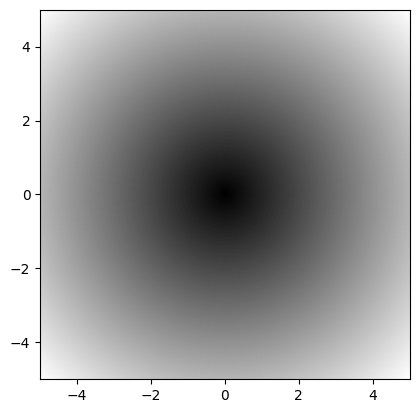

In [212]:
plt.imshow(z, cmap = plt.cm.gray, extent = [-5,5,-5,5])

In [216]:
# plt.colorbar()

Text(0.5, 1.0, 'Image plot of $/sqrt{x^2 + y^2}$ for a grid of values')

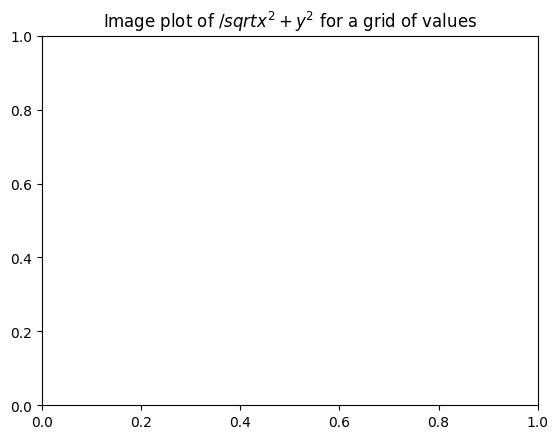

In [215]:
plt.title("Image plot of $/sqrt{x^2 + y^2}$ for a grid of values")

If you're working in IPython, you can close all open plot windows by executing plt.close("all"):

In [218]:
plt.close("all")

```Note```
The term vectorization is used to describe some other computer science concepts, but in this book I use it to describe operations on whole arrays of data at once rather than going value by value using a Python for loop.

### Expressing Conditional Logic as Array Operations
The numpy.where function is a vectorized version of the ternary expression x if condition else y. Suppose we had a Boolean array and two arrays of values:

In [219]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])

In [220]:
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])

In [223]:
cond = np.array([True, False, True, True, False])

Suppose we wanted to take a value from xarr whenever the corresponding value in cond is True, and otherwise take the value from yarr. A list comprehension doing this might look like:

In [224]:
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]

In [225]:
result = [1.1, 2.2, 1.3, 1.4, 2.5]

This has multiple problems. First, it will not be very fast for large arrays (because all the work is being done in interpreted Python code). Second, it will not work with multidimensional arrays. With numpy.where you can do this with a single function call:

In [226]:
result = np.where(cond, xarr, yarr)

In [228]:
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [229]:
result = np.where(cond, xarr, yarr)

In [230]:
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

The second and third arguments to numpy.where don’t need to be arrays; one or both of them can be scalars. A typical use of where in data analysis is to produce a new array of values based on another array. Suppose you had a matrix of randomly generated data and you wanted to replace all positive values with 2 and all negative values with –2. This is possible to do with numpy.where:

In [232]:
arr = rng.standard_normal((4,4))

In [233]:
arr

array([[ 2.61815943,  0.77736134,  0.8286332 , -0.95898831],
       [-1.20938829, -1.41229201,  0.54154683,  0.7519394 ],
       [-0.65876032, -1.22867499,  0.25755777,  0.31290292],
       [-0.13081169,  1.26998312, -0.09296246, -0.06615089]])

In [234]:
arr > 0

array([[ True,  True,  True, False],
       [False, False,  True,  True],
       [False, False,  True,  True],
       [False,  True, False, False]])

In [235]:
np.where(arr > 0,2,-2)

array([[ 2,  2,  2, -2],
       [-2, -2,  2,  2],
       [-2, -2,  2,  2],
       [-2,  2, -2, -2]])

You can combine scalars and arrays when using numpy.where. For example, I can replace all positive values in arr with the constant 2, like so:

In [236]:
np.where(arr > 0, 2, arr)

array([[ 2.        ,  2.        ,  2.        , -0.95898831],
       [-1.20938829, -1.41229201,  2.        ,  2.        ],
       [-0.65876032, -1.22867499,  2.        ,  2.        ],
       [-0.13081169,  2.        , -0.09296246, -0.06615089]])

## Mathematical and Statistical Methods
A set of mathematical functions that compute statistics about an entire array or about the data along an axis are accessible as methods of the array class. You can use aggregations (sometimes called reductions) like sum, mean, and std (standard deviation) either by calling the array instance method or using the top-level NumPy function. When you use the NumPy function, like numpy.sum, you have to pass the array you want to aggregate as the first argument.

Here I generate some normally distributed random data and compute some aggregate statistics:

In [239]:
arr = rng.standard_normal((5, 4))

In [240]:
arr

array([[-1.10821447,  0.13595685,  1.34707776,  0.06114402],
       [ 0.0709146 ,  0.43365454,  0.27748366,  0.53025239],
       [ 0.53672097,  0.61835001, -0.79501746,  0.30003095],
       [-1.60270159,  0.26679883, -1.26162378, -0.07127081],
       [ 0.47404973, -0.41485376,  0.0977165 , -1.64041784]])

In [241]:
arr.mean()

np.float64(-0.08719744457434529)

In [242]:
np.mean(arr)

np.float64(-0.08719744457434529)

In [243]:
arr.sum()

np.float64(-1.743948891486906)

Functions like mean and sum take an optional axis argument that computes the statistic over the given axis, resulting in an array with one less dimension:

In [271]:
arr.mean(axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [245]:
arr.sum(axis=0)

array([-1.62923076,  1.03990647, -0.33436331, -0.82026129])

Here, arr.mean(axis=1) means "compute mean across the columns," where arr.sum(axis=0) means "compute sum down the rows."

Other methods like cumsum and cumprod do not aggregate, instead producing an array of the intermediate results:

In [272]:
arr = np.array([0,1,2,3,4,5,6,7])

In [273]:
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In multidimensional arrays, accumulation functions like cumsum return an array of the same size but with the partial aggregates computed along the indicated axis according to each lower dimensional slice:

In [274]:
arr = np.array([[0,1,2], [3,4,5], [6,7,8]])

In [275]:
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

The expression arr.cumsum(axis=0) computes the cumulative sum along the rows, while arr.cumsum(axis=1) computes the sums along the columns:

In [276]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [277]:
arr.cumsum(axis=1)

array([[ 0,  1,  3],
       [ 3,  7, 12],
       [ 6, 13, 21]])

### Methods for Boolean Arrays
Boolean values are coerced to 1 (True) and 0 (False) in the preceding methods. Thus, sum is often used as a means of counting True values in a Boolean array:

In [278]:
arr = rng.standard_normal(100)

In [279]:
(arr > 0).sum()

np.int64(55)

You can sort each one-dimensional section of values in a multidimensional array in place along an axis by passing the axis number to sort. In this example data:

In [290]:
arr = rng.standard_normal((5,3))

In [291]:
arr

array([[-1.31400358, -0.51035251, -0.09986088],
       [-0.12950676, -1.39670506,  0.19380935],
       [-0.12929273,  0.35447909, -1.08287264],
       [ 0.24493923,  0.22082079, -0.66043248],
       [-0.21853515, -0.55599901,  1.35638101]])

In [292]:
# arr.sort(axis=0) # sorts the values within each column, while

In [293]:
# arr.sort(axis=1) # sorts across each row:

In [294]:
arr.sort(axis=0)

In [295]:
arr

array([[-1.31400358, -1.39670506, -1.08287264],
       [-0.21853515, -0.55599901, -0.66043248],
       [-0.12950676, -0.51035251, -0.09986088],
       [-0.12929273,  0.22082079,  0.19380935],
       [ 0.24493923,  0.35447909,  1.35638101]])

In [296]:
arr.sort(axis=1)

In [297]:
arr

array([[-1.39670506, -1.31400358, -1.08287264],
       [-0.66043248, -0.55599901, -0.21853515],
       [-0.51035251, -0.12950676, -0.09986088],
       [-0.12929273,  0.19380935,  0.22082079],
       [ 0.24493923,  0.35447909,  1.35638101]])

In [298]:
arr2 = np.array([5,-10,7,1,0,-3])

In [299]:
sorted_arr2 = np.sort(arr2)

In [300]:
sorted_arr2

array([-10,  -3,   0,   1,   5,   7])

### Unique and Other Set Logic
NumPy has some basic set operations for one-dimensional ndarrays. A commonly used one is numpy.unique, which returns the sorted unique values in an array:

In [301]:
names = np.array(["Bob", "Will", "Joe", "Bob", "Will", "Joe", "Joe"])

In [302]:
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [303]:
ints = np.array([3,3,3,2,2,1,1,4,4])

In [304]:
np.unique(ints)

array([1, 2, 3, 4])

Contrast numpy.unique with the pure Python alternative:

In [305]:
sorted(set(names))

[np.str_('Bob'), np.str_('Joe'), np.str_('Will')]

In many cases, the NumPy version is faster and returns a NumPy array rather than a Python list.

Another function, numpy.in1d, tests membership of the values in one array in another, returning a Boolean array:

In [307]:
values = np.array([6,0,0,3,2,5,6])

In [308]:
np.in1d(values, [2,3,6])

/var/folders/5q/z1l12s4n7y1bxgmlhw1vkr7c0000gp/T/ipykernel_24762/1269275309.py:1: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  np.in1d(values, [2,3,6])


array([ True, False, False,  True,  True, False,  True])

# 4.5 File Input and Output with Arrays
NumPy is able to save and load data to and from disk in some text or binary formats. In this section I discuss only NumPy's built-in binary format, since most users will prefer pandas and other tools for loading text or tabular data (see Ch 6: Data Loading, Storage, and File Formats for much more).

numpy.save and numpy.load are the two workhorse functions for efficiently saving and loading array data on disk. Arrays are saved by default in an uncompressed raw binary format with file extension .npy:

In [309]:
arr = np.arange(10)

In [310]:
np.save("some_array", arr)

If the file path does not already end in .npy, the extension will be appended. The array on disk can then be loaded with numpy.load:

In [313]:
np.load("some_array.npy")

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

You can save multiple arrays in an uncompressed archive using numpy.savez and passing the arrays as keyword arguments:

In [314]:
np.savez("array_archive.npz", a=arr, b=arr)

When loading an .npz file, you get back a dictionary-like object that loads the individual arrays lazily:

In [315]:
arch = np.load("array_archive.npz")

In [316]:
arch["b"]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

If your data compresses well, you may wish to use numpy.savez_compressed instead:

In [319]:
np.savez_compressed("arrays_compressed.npz", a=arr, b=arr)

# 4.6 Linear Algebra
Linear algebra operations, like matrix multiplication, decompositions, determinants, and other square matrix math, are an important part of many array libraries. Multiplying two two-dimensional arrays with * is an element-wise product, while matrix multiplications require either using the dot function or the @ infix operator. dot is both an array method and a function in the numpy namespace for doing matrix multiplication:

In [348]:
x = np.array([[1., 2., 3.], [4.,5.,6.]])

In [349]:
y = np.array([[6., 23.], [-1,7], [8,9]])

In [350]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [351]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [352]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

x.dot(y) is equivalent to np.dot(x, y):

In [353]:
np.dot(x,y)

array([[ 28.,  64.],
       [ 67., 181.]])

A matrix product between a two-dimensional array and a suitably sized one-dimensional array results in a one-dimensional array:

In [354]:
x @ np.ones(3)

array([ 6., 15.])

numpy.linalg has a standard set of matrix decompositions and things like inverse and determinant:

In [355]:
from numpy.linalg import inv, qr

In [356]:
X = rng.standard_normal((5,5))

In [357]:
mat = X.T @ X

In [358]:
inv(mat)

array([[ 0.74070708, -1.0918144 ,  0.10442027, -1.53559172,  0.2248847 ],
       [-1.0918144 ,  2.53533445, -0.50308036,  3.57943184, -0.67812838],
       [ 0.10442027, -0.50308036,  0.36916788, -0.84255774,  0.27808015],
       [-1.53559172,  3.57943184, -0.84255774,  5.42550695, -1.08667531],
       [ 0.2248847 , -0.67812838,  0.27808015, -1.08667531,  0.52253816]])

The expression X.T.dot(X) computes the dot product of X with its transpose X.T.

# 4.7 Example: Random Walks
The simulation of random walks provides an illustrative application of utilizing array operations. Let’s first consider a simple random walk starting at 0 with steps of 1 and –1 occurring with equal probability.

Here is a pure Python way to implement a single random walk with 1,000 steps using the built-in random module:

In [364]:
#! blocstart
import random
position = 0
walk = [position]
nsteps = 1000
for _ in range(nsteps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)
#! blockend




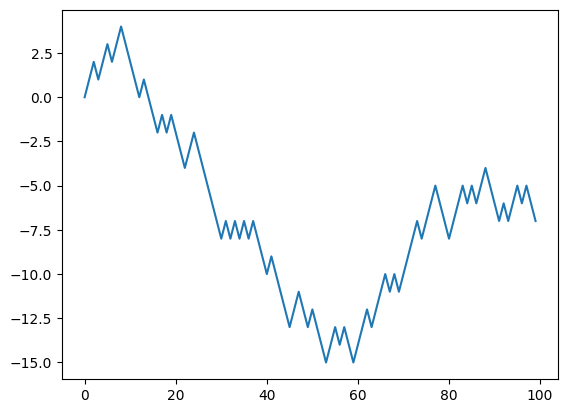

In [366]:
plt.plot(walk[:100])

You might make the observation that walk is the cumulative sum of the random steps and could be evaluated as an array expression. Thus, I use the numpy.random module to draw 1,000 coin flips at once, set these to 1 and –1, and compute the cumulative sum:

In [367]:
nsteps = 1000

In [368]:
rng = np.random.default_rng(seed=12345)

In [369]:
draws = rng.integers(0,2, size=nsteps)

In [371]:
steps = np.where(draws == 0, 1, -1)

In [373]:
walk = steps.cumsum()

From this we can begin to extract statistics like the minimum and maximum value along the walk’s trajectory:

In [374]:
walk.min()

np.int64(-8)

In [375]:
walk.max()

np.int64(50)

A more complicated statistic is the first crossing time, the step at which the random walk reaches a particular value. Here we might want to know how long it took the random walk to get at least 10 steps away from the origin 0 in either direction. np.abs(walk) >= 10 gives us a Boolean array indicating where the walk has reached or exceeded 10, but we want the index of the first 10 or –10. Turns out, we can compute this using argmax, which returns the first index of the maximum value in the Boolean array (True is the maximum value):

In [377]:
(np.abs(walk) >=10).argmax()

np.int64(155)

Note that using argmax here is not always efficient because it always makes a full scan of the array. In this special case, once a True is observed we know it to be the maximum value.

### Simulating Many Random Walks at Once
If your goal was to simulate many random walks, say five thousand of them, you can generate all of the random walks with minor modifications to the preceding code. If passed a 2-tuple, the numpy.random functions will generate a two-dimensional array of draws, and we can compute the cumulative sum for each row to compute all five thousand random walks in one shot:

In [379]:
nwalks = 5000

In [380]:
nsteps = 1000

In [381]:
draws = rng.integers(0,2, size=(nwalks, nsteps))

In [382]:
steps = np.where(draws > 0, 1, -1)

In [383]:
walks = steps.cumsum(axis=1)

In [384]:
walks

array([[  1,   2,   3, ...,  22,  23,  22],
       [  1,   0,  -1, ..., -50, -49, -48],
       [  1,   2,   3, ...,  50,  49,  48],
       ...,
       [ -1,  -2,  -1, ..., -10,  -9, -10],
       [ -1,  -2,  -3, ...,   8,   9,   8],
       [ -1,   0,   1, ...,  -4,  -3,  -2]])

Now, we can compute the maximum and minimum values obtained over all of the walks:

In [385]:
walks.max()

np.int64(114)

In [386]:

walks.min()

np.int64(-120)

Out of these walks, let’s compute the minimum crossing time to 30 or –30. This is slightly tricky because not all 5,000 of them reach 30. We can check this using the any method:

In [389]:
hits30 = (np.abs(walks) >= 30).any(axis=1)

In [390]:
hits30

array([False,  True,  True, ...,  True, False,  True])

In [391]:
hits30.sum()

np.int64(3395)

We can use this Boolean array to select the rows of walks that actually cross the absolute 30 level, and call argmax across axis 1 to get the crossing times:

In [398]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(axis=1)

In [399]:
crossing_times

array([201, 491, 283, ..., 219, 259, 541])

Lastly, we compute the average minimum crossing time:

In [400]:
crossing_times.mean()

np.float64(500.5699558173785)

In [401]:
crossing_times.mean()

np.float64(500.5699558173785)

In [404]:
draws = 0.25 * rng.standard_normal((nwalks, nsteps))